## **Training One Class SVM**

In [ ]:
#finding optimal parameters
param_dist = {
    'kernel': ['rbf'],
    'nu': stats.uniform(0.01, 0.99),  # Uniform distribution between 0.1 and 0.5
    'gamma': ['auto']  # Log-uniform distribution for gamma
}
model = OneClassSVM()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train_scaled)
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_clf = random_search.best_estimator_

# Predict outliers on the test set
y_pred = best_clf.predict(X_train_scaled)

# Count outliers (-1 indicates outliers)
outliers = (y_pred == -1).sum()
print(f"Number of outliers detected: {outliers}")

In [ ]:
X = X_train_scaled
clf = OneClassSVM(nu=0.01, kernel ='rbf', gamma='auto').fit(X)

outliers_train = clf.predict(X)
outliers = np.count_nonzero(outliers_train==-1)
inliers = np.count_nonzero(outliers_train==1)
print("Training Data")
print("Outliers:",outliers)
print( "Inliers:",inliers)

#src = (clf.score_samples(X))
#finding labels
# The following line is changed to index into X instead of outliers_train
outlier_indices = np.where(clf.predict(X) == -1)[0]
outlier_labels = y_train_scaled[outlier_indices]
#print(f"Outlier Labels: {outlier_labels}")
label_counts = Counter(outlier_labels)
df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Count'])
print(df)


#testing
outliers_test = clf.predict(X_test_scaled)
outliers = np.count_nonzero(outliers_test==-1)
inliers = np.count_nonzero(outliers_test==1)
print("\n\n")
print("Testing Data")
print("Outliers:",outliers)
print( "Inliers:",inliers)

#src = (clf.score_samples(X))
#finding labels
# The following line is changed to index into X_test_scaled instead of outliers_test
outlier_indices = np.where(clf.predict(X_test_scaled) == -1)[0]
outlier_labels = y_test_scaled[outlier_indices]
#print(f"Outlier Labels: {outlier_labels}")
label_counts = Counter(outlier_labels)
df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Count'])
print(df)

Training Data
Outliers: 404
Inliers: 34589
             Count
ur-Urdu         41
sd-Sindhi       42
te-Telugu       52
ta-Tamil        22
pa-Panjabi      59
si-Sinhala      46
bn-Bengali      38
hi-Hindi        43
ne-Nepali       18
as-Assamese     43



Testing Data
Outliers: 258
Inliers: 14739
             Count
bn-Bengali      29
pa-Panjabi      38
sd-Sindhi       29
te-Telugu       32
ta-Tamil        26
ur-Urdu         33
as-Assamese     24
si-Sinhala      11
hi-Hindi        23
ne-Nepali       13


In [ ]:
#pca reduced features = components
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
components = pca.fit_transform(X_train_scaled)
X = components
clf = OneClassSVM(nu=0.01, kernel ='rbf', gamma='auto').fit(X)

outliers_pca = clf.predict(X)
outliers = np.count_nonzero(outliers_pca==-1)
inliers = np.count_nonzero(outliers_pca==1)
print("PCA Training Data")
print("Outliers:",outliers)
print( "Inliers:",inliers)


PCA Training Data
Outliers: 9304
Inliers: 25689


### **Plotting Outliers**

In [ ]:
# Separate inliers and outliers for plotting
inlier_indices = np.where(outliers_pca == 1)[0]
outlier_indices = np.where(outliers_pca == -1)[0]

# Count inliers and outliers
num_inliers = len(inlier_indices)
num_outliers = len(outlier_indices)


# Create DataFrame for plotting
df_plot = pd.DataFrame(components, columns=['PCA1', 'PCA2'])
df_plot['Inliers'] = outliers_pca == 1  # Mark outliers as False

# Plot inliers and outliers
fig = px.scatter(df_plot, x='PCA1', y='PCA2', color='Inliers',
                 title='One-Class SVM Outlier Detection',
                 labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'})

# Add legend with counts
fig.update_layout(legend_title_text=f'Inliers: {num_inliers}, Outliers: {num_outliers} (Red)')
fig.show()

Number of inliers: 26735
Number of outliers: 8258


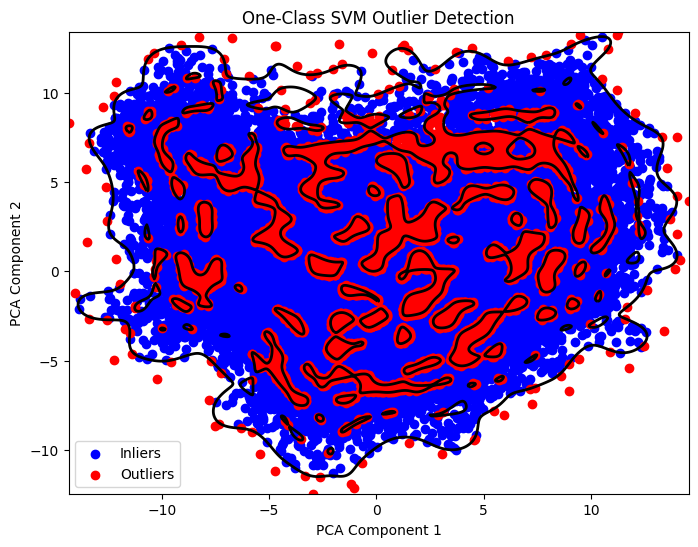

In [ ]:


# Count inliers and outliers
n_inliers = (outliers_pca == 1).sum()
n_outliers = (outliers_pca == -1).sum()

print("Number of inliers:", n_inliers)
print("Number of outliers:", n_outliers)


# Plot decision boundary and data points
plt.figure(figsize=(8, 6))
plt.scatter(X[outliers_pca == 1, 0], X[outliers_pca == 1, 1], color='blue', label='Inliers')
plt.scatter(X[outliers_pca == -1, 0], X[outliers_pca == -1, 1], color='red', label='Outliers')

# Plot decision boundary (this part can be tricky and depends on the kernel)
# For a simple visualization, you can create a meshgrid and predict on it
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.title("One-Class SVM Outlier Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()